In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

torch.manual_seed(86)

num_samples = 20
hidden_size = 200
num_epochs = 500

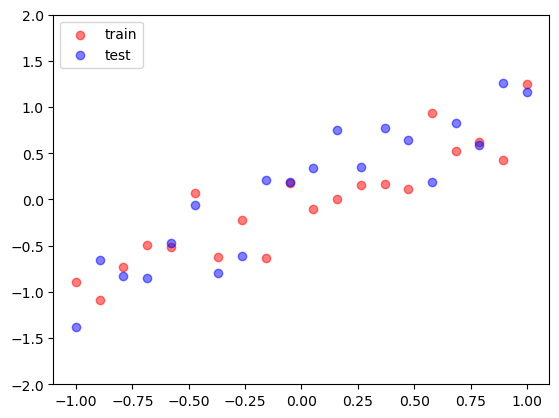

In [6]:
x_train = torch.unsqueeze(torch.linspace(-1,1,num_samples),1)
# torchl.linspace(-1,1,num_samples):在区间[-1,1]上生成num_samples个等距点，形状为(20,)
# torch.unsqueeze(...,1):在维度1上增加一个维度，将x_train形状变为(20，1)
y_train = x_train + 0.3* torch.randn(num_samples,1)
# torch.randn(num_samples,1):生成num_samples个服从标准正态分布的一维随机噪声

x_test = torch.unsqueeze(torch.linspace(-1,1,num_samples),1)
y_test = x_test + 0.3* torch.randn(num_samples,1)

plt.scatter(x_train,y_train,c = 'r', alpha = 0.5, label = 'train')
plt.scatter(x_test,y_test,c = 'b',alpha = 0.5,label = 'test')
plt.legend(loc = 'upper left')
plt.ylim(-2,2)
plt.show()

### 模型定义

In [21]:
net_overfitting = torch.nn.Sequential(
    torch.nn.Linear(1,hidden_size),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_size,hidden_size),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_size,1)
)

net_dropout = torch.nn.Sequential(
    torch.nn.Linear(1,hidden_size),
    torch.nn.Dropout(0.5),
    # Dropout层，训练时以0.5概率随机失活神经元，防止过拟合
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_size,hidden_size),
    torch.nn.Dropout(0.5),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_size,1)
)

### 模型训练

In [22]:
optimizer_overfitting = torch.optim.Adam(net_overfitting.parameters(),lr = 0.01)
# 位net_overfitting模型定义Adam优化器，学习率为0.01
optimizer_dropout = torch.optim.Adam(net_dropout.parameters(),lr = 0.01)

criterion = nn.MSELoss()

for i in range(num_epochs):
    pred_overfitting = net_overfitting(x_train)
    loss_overfitting = criterion(pred_overfitting,y_train)
    optimizer_overfitting.zero_grad()
    loss_overfitting.backward()
    optimizer_overfitting.step()

    pred_dropout = net_dropout(x_train)
    loss_dropout = criterion(pred_dropout,y_train)
    optimizer_dropout.zero_grad()
    loss_dropout.backward()
    optimizer_dropout.step()

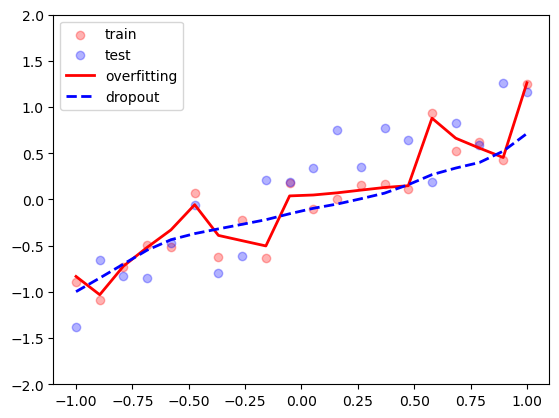

In [23]:
net_overfitting.eval()
net_dropout.eval()
# 将模型切换为评估模式，对于含有Dropout的模型，评估模式会关闭Dropout功能
# 确保测试时输出稳定（不随机失活神经元）

test_pred_overfitting = net_overfitting(x_test)
test_pred_dropout = net_dropout(x_test)

plt.scatter(x_train,y_train,c = 'r',alpha = 0.3,label = 'train')
plt.scatter(x_test,y_test,c = 'b',alpha = 0.3,label = 'test')
plt.plot(x_test,test_pred_overfitting.data.numpy(),'r-',lw = 2,label='overfitting')
# 'r-':红色实线
# lw = 2:线宽为2
plt.plot(x_test,test_pred_dropout.data.numpy(),'b--',lw = 2,label = 'dropout')
# 'b--':蓝色虚线
plt.legend(loc = 'upper left')
# 在图形左上角显示图例
plt.ylim(-2,2)
plt.show()